In [1]:
import os
import numpy as np
import pandas as pd

import cv2 as cv
import matplotlib.pyplot as plt

import torch
from torchvision.io import read_image

from tqdm.auto import tqdm

In [15]:
def preprocess_image(img_path, img_width=224, img_height=224):

    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    # Resize images
    dim = (img_width, img_height)
    img = cv.resize(img, dim, interpolation=cv.INTER_LINEAR)
    
    # Equalization (quan trọng!)
    img_yuv = cv.cvtColor(img, cv.COLOR_RGB2YUV)
    # Thay đoạn equalizeHist bằng:
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])
    img_equ = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
    
    # Denoising (quan trọng!)
    dst_img = cv.fastNlMeansDenoisingColored(
        src=img_equ,
        dst=None,
        h=3,
        hColor=10,
        templateWindowSize=7,
        searchWindowSize=21
    )

    dst_img = cv.cvtColor(dst_img, cv.COLOR_RGB2BGR)
    
    return dst_img

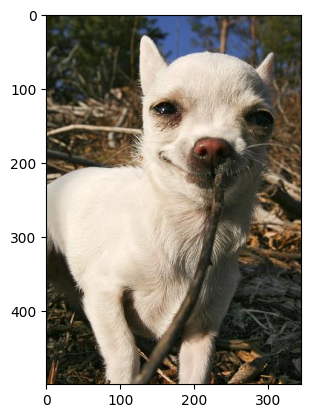

In [3]:
img_path = r'C:\Users\VICTUS\Desktop\create\xla_re\raw\images\Images\n02085620-Chihuahua\n02085620_1073.jpg'
img = read_image(img_path)
plt.imshow(img.permute(1, 2, 0))

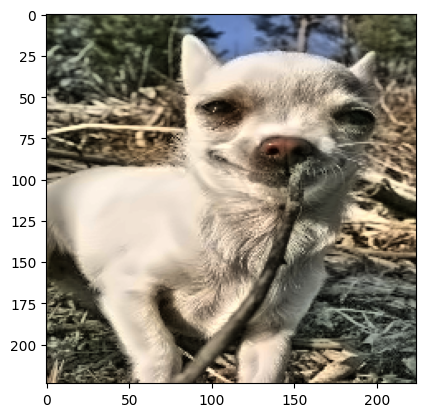

In [4]:
img_pre = preprocess_image(img_path)
plt.imshow(img_pre)

In [7]:
data_raw_path = '../raw/images/Images'

In [8]:
len(os.listdir(data_raw_path))

120

In [16]:
def create_preprocess_data(data_raw_path, output_path='../data_processed'):
    os.makedirs(output_path, exist_ok=True)
    for class_name in os.listdir(data_raw_path):
        class_path = os.path.join(output_path, class_name)
        os.makedirs(class_path, exist_ok=True)
        for img_name in os.listdir(os.path.join(data_raw_path, class_name)):
            img_path = os.path.join(data_raw_path, class_name, img_name)
            img = preprocess_image(img_path)
            cv.imwrite(os.path.join(class_path, img_name), img)

create_preprocess_data(data_raw_path)